# OpenCV Geometric Transformations Tutorial

This notebook explores geometric transformations using OpenCV, including affine and perspective transformations.

## Contents
1. [Setup and Installation](#setup)
2. [Affine Transformations](#affine)
3. [Perspective Transformations](#perspective)
4. [Image Warping](#warping)
5. [Practical Applications](#applications)
6. [Exercises](#exercises)

## 1. Setup and Installation {#setup}

First, let's import the necessary libraries and our custom modules.

In [35]:
# Install required packages if not already installed
# !pip install opencv-python numpy matplotlib

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Add our source directory to Python path
sys.path.append('../src')

# Import our custom modules
from transformations import affine_transforms, perspective_transforms, warping
from basic_operations import image_io, display
from utils import visualization

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


## 2. Affine Transformations {#affine}

Affine transformations preserve points, straight lines, and planes. They include translation, rotation, scaling, and shearing.

### 2.1 Translation
Moving an image by a specific offset.

Image shape: (300, 400, 3)


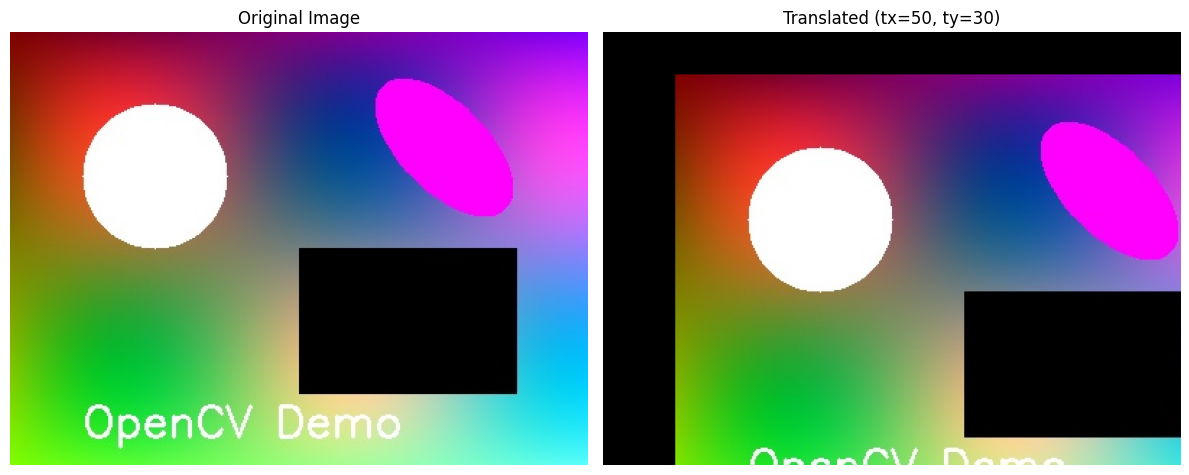

In [36]:
# Load sample image
image_path = '../sample_images/original/demo_image.jpg'
if os.path.exists(image_path):
    image = image_io.load_image(image_path)
else:
    # Create a demo image if sample doesn't exist
    image = np.zeros((300, 400, 3), dtype=np.uint8)
    cv2.rectangle(image, (50, 50), (150, 150), (255, 0, 0), -1)
    cv2.circle(image, (300, 100), 50, (0, 255, 0), -1)
    cv2.putText(image, 'Demo', (200, 250), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)

print(f"Image shape: {image.shape}")

# Apply translation
tx, ty = 50, 30  # Translation values
translated_image = affine_transforms.translate(image, tx, ty)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Translated (tx={tx}, ty={ty})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 2.2 Rotation
Rotating an image around a center point.

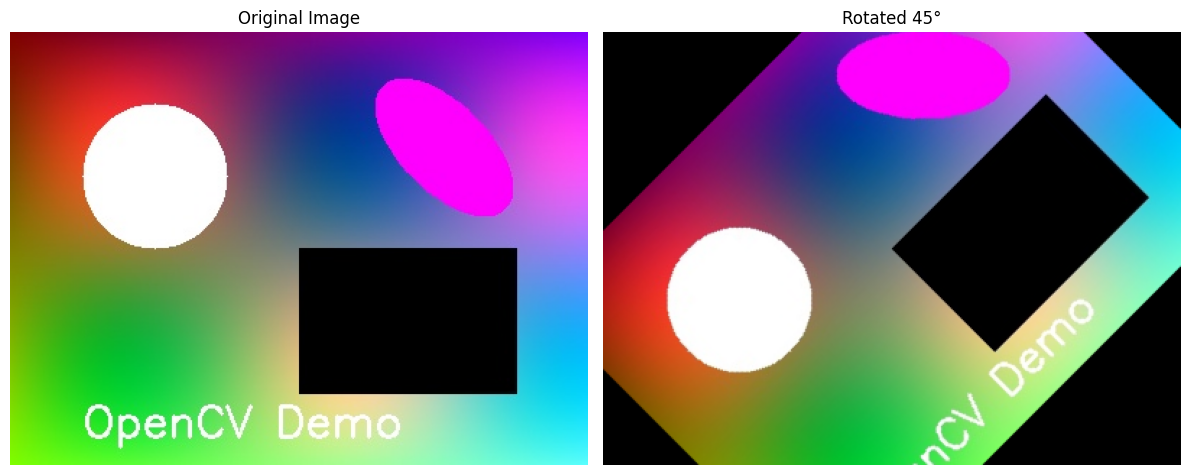

In [37]:
# Apply rotation
angle = 45  # Rotation angle in degrees
center = None  # Use image center if None
scale = 1.0   # Scale factor

rotated_image = affine_transforms.rotate(image, angle, center, scale)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Rotated {angle}°')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 2.3 Scaling
Resizing an image with different scale factors for x and y axes.

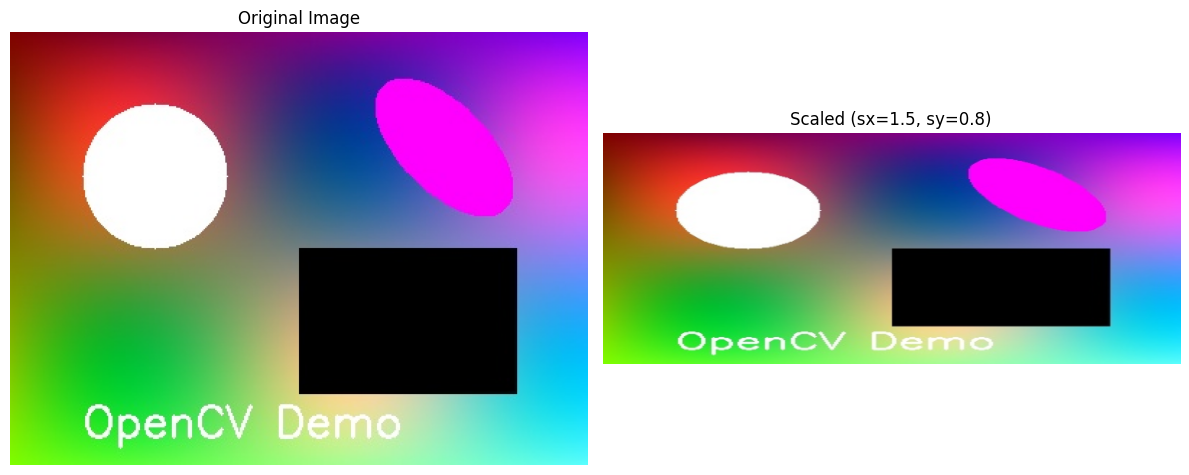

In [38]:
# Apply scaling
scale_x, scale_y = 1.5, 0.8  # Scale factors
scaled_image = affine_transforms.scale(image, scale_x, scale_y)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Scaled (sx={scale_x}, sy={scale_y})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 2.4 Shearing
Applying shear transformation to create a slanted effect.

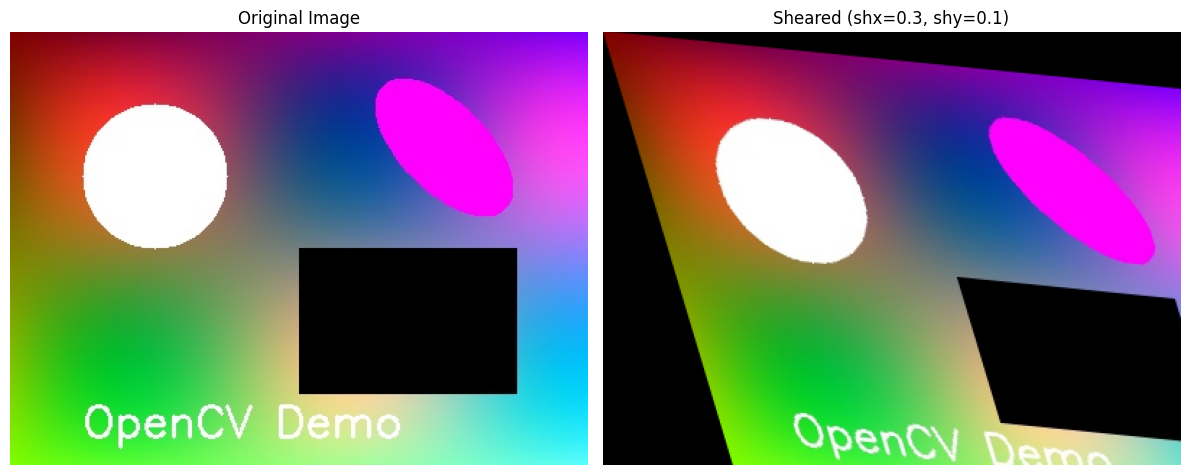

In [39]:
# Apply shearing
shear_x, shear_y = 0.3, 0.1  # Shear factors
sheared_image = affine_transforms.shear(image, shear_x, shear_y)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(sheared_image, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Sheared (shx={shear_x}, shy={shear_y})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 2.5 Combined Affine Transformation
Applying multiple transformations in sequence.

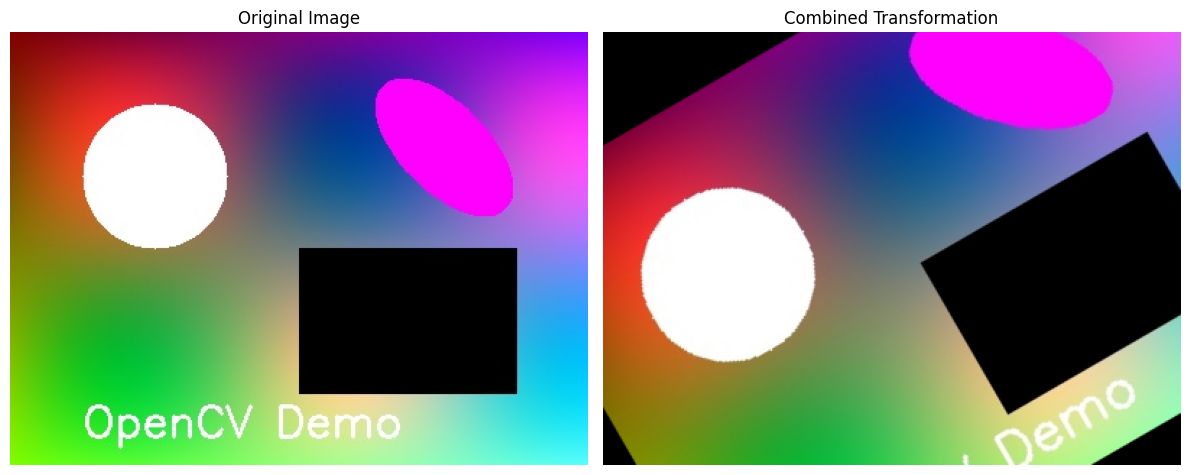

Transformation matrix:
[[  1.03923048   0.6        -77.84609691]
 [ -0.6          1.03923048 124.11542732]]


In [40]:
# Create a custom affine transformation matrix
# Combine rotation, scaling, and translation
center = (image.shape[1]//2, image.shape[0]//2)
angle = 30
scale = 1.2
M_rot_scale = cv2.getRotationMatrix2D(center, angle, scale)

# Add translation
M_rot_scale[0, 2] += 20  # x translation
M_rot_scale[1, 2] += 10  # y translation

# Apply transformation
combined_image = affine_transforms.affine_transform(image, M_rot_scale)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Combined Transformation')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("Transformation matrix:")
print(M_rot_scale)

## 3. Perspective Transformations {#perspective}

Perspective transformations can change the perspective of an image, useful for correcting camera angles or creating artistic effects.

### 3.1 Four-Point Perspective Transform

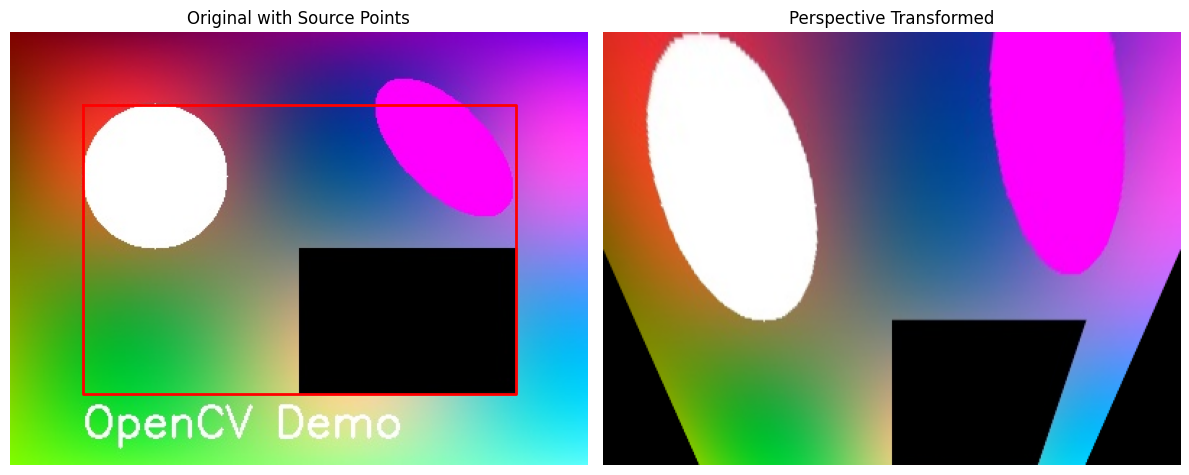

In [41]:
# Define source and destination points for perspective transformation
height, width = image.shape[:2]

# Source points (corners of the original image)
src_points = np.float32([
    [50, 50],      # Top-left
    [width-50, 50], # Top-right
    [50, height-50], # Bottom-left
    [width-50, height-50] # Bottom-right
])

# Destination points (desired perspective)
dst_points = np.float32([
    [0, 0],        # Top-left
    [width, 0],    # Top-right
    [100, height], # Bottom-left (shifted)
    [width-100, height] # Bottom-right (shifted)
])

# Apply perspective transformation
perspective_image = perspective_transforms.perspective_transform(image, src_points, dst_points)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].plot(src_points[[0,1,3,2,0], 0], src_points[[0,1,3,2,0], 1], 'r-', linewidth=2)
axes[0].set_title('Original with Source Points')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(perspective_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Perspective Transformed')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 3.2 Document Scanning Simulation
Simulating the perspective correction often used in document scanning apps.

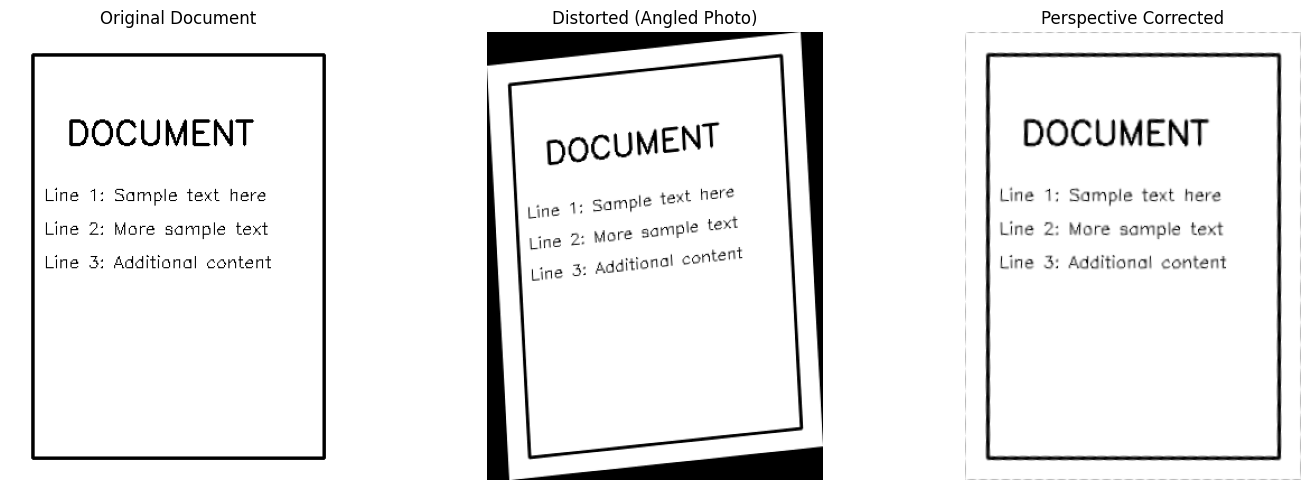

In [42]:
# Create a document-like image
doc_image = np.ones((400, 300, 3), dtype=np.uint8) * 255
cv2.rectangle(doc_image, (20, 20), (280, 380), (0, 0, 0), 2)
cv2.putText(doc_image, 'DOCUMENT', (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
cv2.putText(doc_image, 'Line 1: Sample text here', (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
cv2.putText(doc_image, 'Line 2: More sample text', (30, 180), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
cv2.putText(doc_image, 'Line 3: Additional content', (30, 210), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

# Apply perspective distortion (simulating angled photo)
h, w = doc_image.shape[:2]
src_rect = np.float32([[0, 0], [w, 0], [0, h], [w, h]])
dst_quad = np.float32([[0, 30], [w-20, 0], [20, h], [w, h-30]])

# Create perspective distortion
M_distort = cv2.getPerspectiveTransform(src_rect, dst_quad)
distorted_doc = cv2.warpPerspective(doc_image, M_distort, (w, h))

# Correct the perspective
corrected_doc = perspective_transforms.perspective_correction(distorted_doc, dst_quad, w, h)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(doc_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Document')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(distorted_doc, cv2.COLOR_BGR2RGB))
axes[1].set_title('Distorted (Angled Photo)')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(corrected_doc, cv2.COLOR_BGR2RGB))
axes[2].set_title('Perspective Corrected')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## 4. Image Warping {#warping}

Image warping allows for more complex deformations including barrel and pincushion distortion corrections.

### 4.1 Barrel Distortion Correction

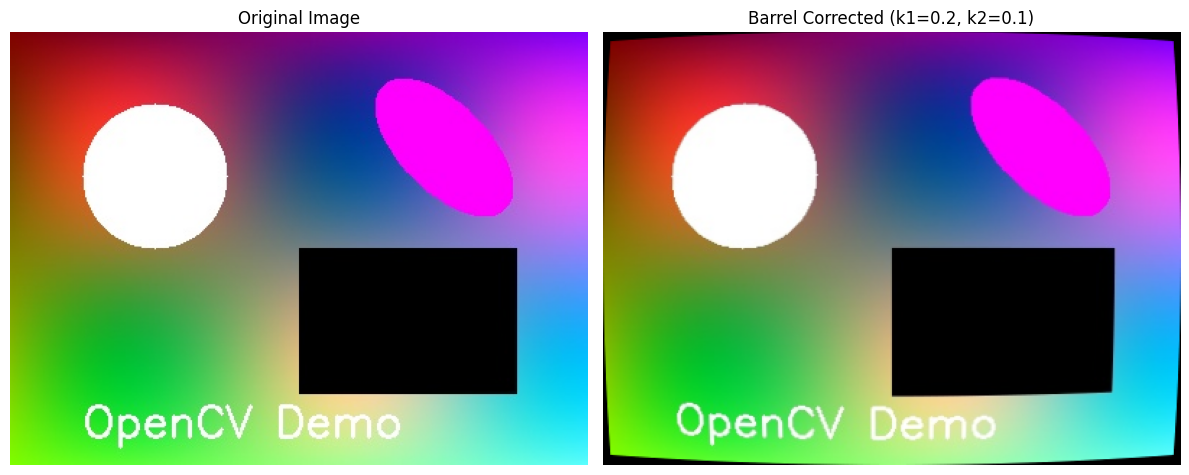

In [43]:
# Apply barrel distortion correction
k1, k2 = 0.2, 0.1  # Distortion coefficients
corrected_barrel = warping.barrel_distortion_correction(image, k1, k2)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(corrected_barrel, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Barrel Corrected (k1={k1}, k2={k2})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 4.2 Custom Warping
Creating custom warp effects using displacement maps.

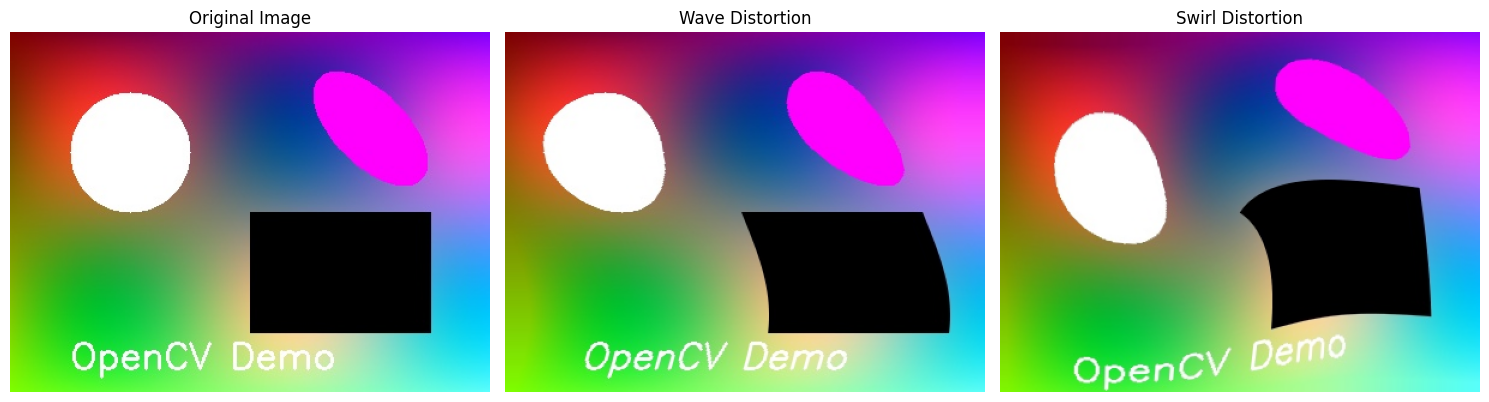

In [44]:
# Create custom wave and swirl distortion effects since they're not in the warping module
def create_wave_distortion(image, wave_amplitude=20, wave_frequency=0.02):
    """Create wave distortion effect."""
    h, w = image.shape[:2]
    
    # Create coordinate arrays
    x = np.arange(w)
    y = np.arange(h)
    x_coords, y_coords = np.meshgrid(x, y)
    
    # Apply wave distortion
    x_wave = x_coords + wave_amplitude * np.sin(wave_frequency * y_coords)
    y_wave = y_coords.copy()
    
    # Ensure coordinates are within bounds
    x_wave = np.clip(x_wave, 0, w-1)
    
    return cv2.remap(image, x_wave.astype(np.float32), y_wave.astype(np.float32), cv2.INTER_LINEAR)

def create_swirl_distortion(image, swirl_strength=1.0):
    """Create swirl distortion effect."""
    h, w = image.shape[:2]
    center_x, center_y = w // 2, h // 2
    
    # Create coordinate arrays
    x = np.arange(w) - center_x
    y = np.arange(h) - center_y
    x_coords, y_coords = np.meshgrid(x, y)
    
    # Calculate distance from center
    r = np.sqrt(x_coords**2 + y_coords**2)
    
    # Apply swirl transformation
    theta = np.arctan2(y_coords, x_coords) + swirl_strength * np.exp(-r / (min(w, h) / 4))
    
    x_swirl = r * np.cos(theta) + center_x
    y_swirl = r * np.sin(theta) + center_y
    
    # Ensure coordinates are within bounds
    x_swirl = np.clip(x_swirl, 0, w-1)
    y_swirl = np.clip(y_swirl, 0, h-1)
    
    return cv2.remap(image, x_swirl.astype(np.float32), y_swirl.astype(np.float32), cv2.INTER_LINEAR)

# Create wave distortion effect
wave_amplitude = 20
wave_frequency = 0.02
wave_warped = create_wave_distortion(image, wave_amplitude, wave_frequency)

# Create swirl effect
swirl_strength = 1.0
swirl_warped = create_swirl_distortion(image, swirl_strength)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(wave_warped, cv2.COLOR_BGR2RGB))
axes[1].set_title('Wave Distortion')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(swirl_warped, cv2.COLOR_BGR2RGB))
axes[2].set_title('Swirl Distortion')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## 5. Practical Applications {#applications}

### 5.1 Image Registration
Aligning two images using feature-based matching and transformation.

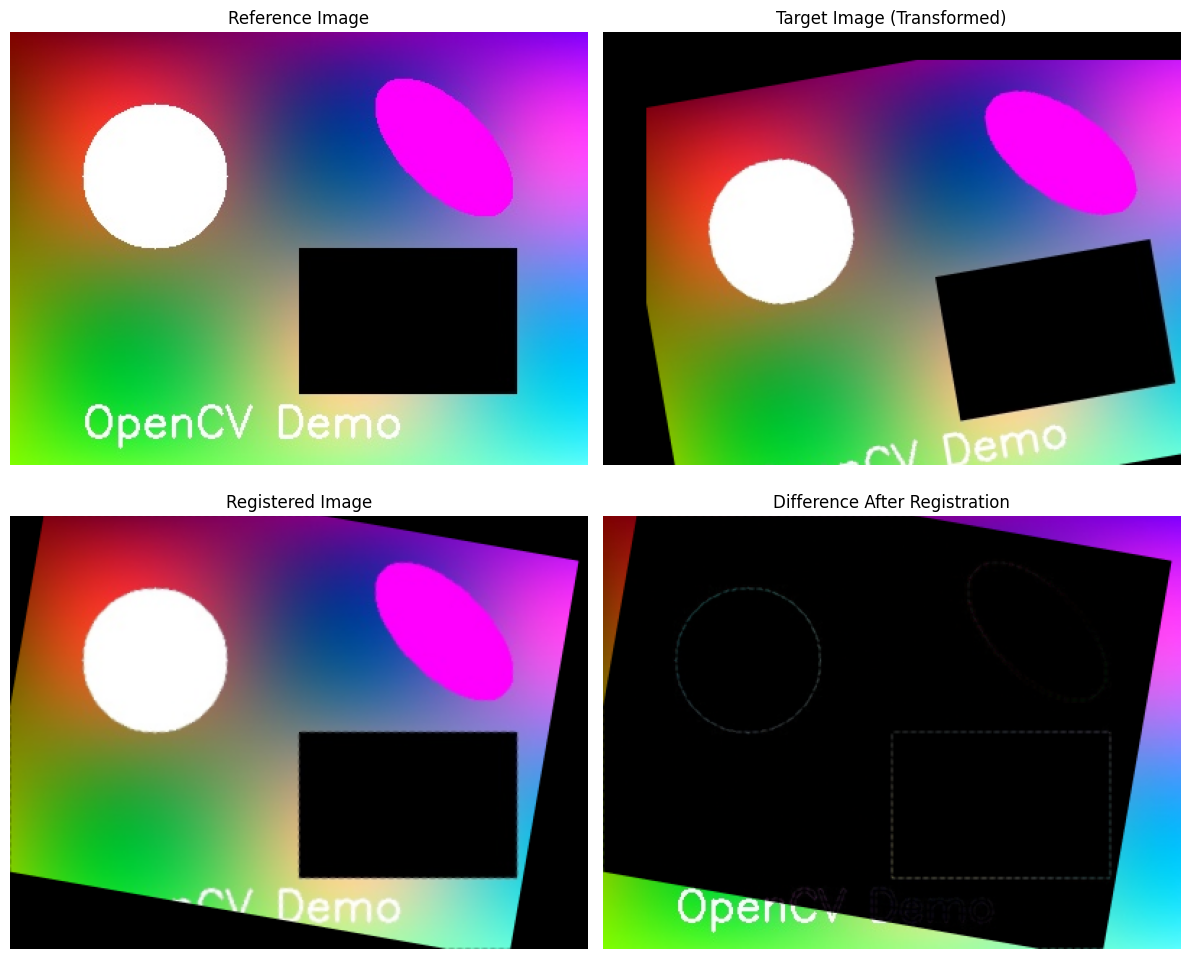

In [45]:
# Create two slightly different images for registration demo
img1 = image.copy()
img2 = affine_transforms.rotate(image, 10)
img2 = affine_transforms.translate(img2, 30, 20)

# Simple image registration simulation (using inverse transformation)
# In a real scenario, this would use feature matching
def simple_register_images(reference, target):
    """Simple image registration by applying inverse transformation."""
    # For demo purposes, we'll just apply a reverse transformation
    # In practice, this would use SIFT/ORB features and homography estimation
    registered = affine_transforms.translate(target, -30, -20)
    registered = affine_transforms.rotate(registered, -10)
    return registered

registered_img = simple_register_images(img1, img2)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0,0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('Reference Image')
axes[0,0].axis('off')

axes[0,1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[0,1].set_title('Target Image (Transformed)')
axes[0,1].axis('off')

axes[1,0].imshow(cv2.cvtColor(registered_img, cv2.COLOR_BGR2RGB))
axes[1,0].set_title('Registered Image')
axes[1,0].axis('off')

# Show difference
diff = cv2.absdiff(img1, registered_img)
axes[1,1].imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
axes[1,1].set_title('Difference After Registration')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

### 5.2 Panorama Creation
Combining multiple images with perspective correction.

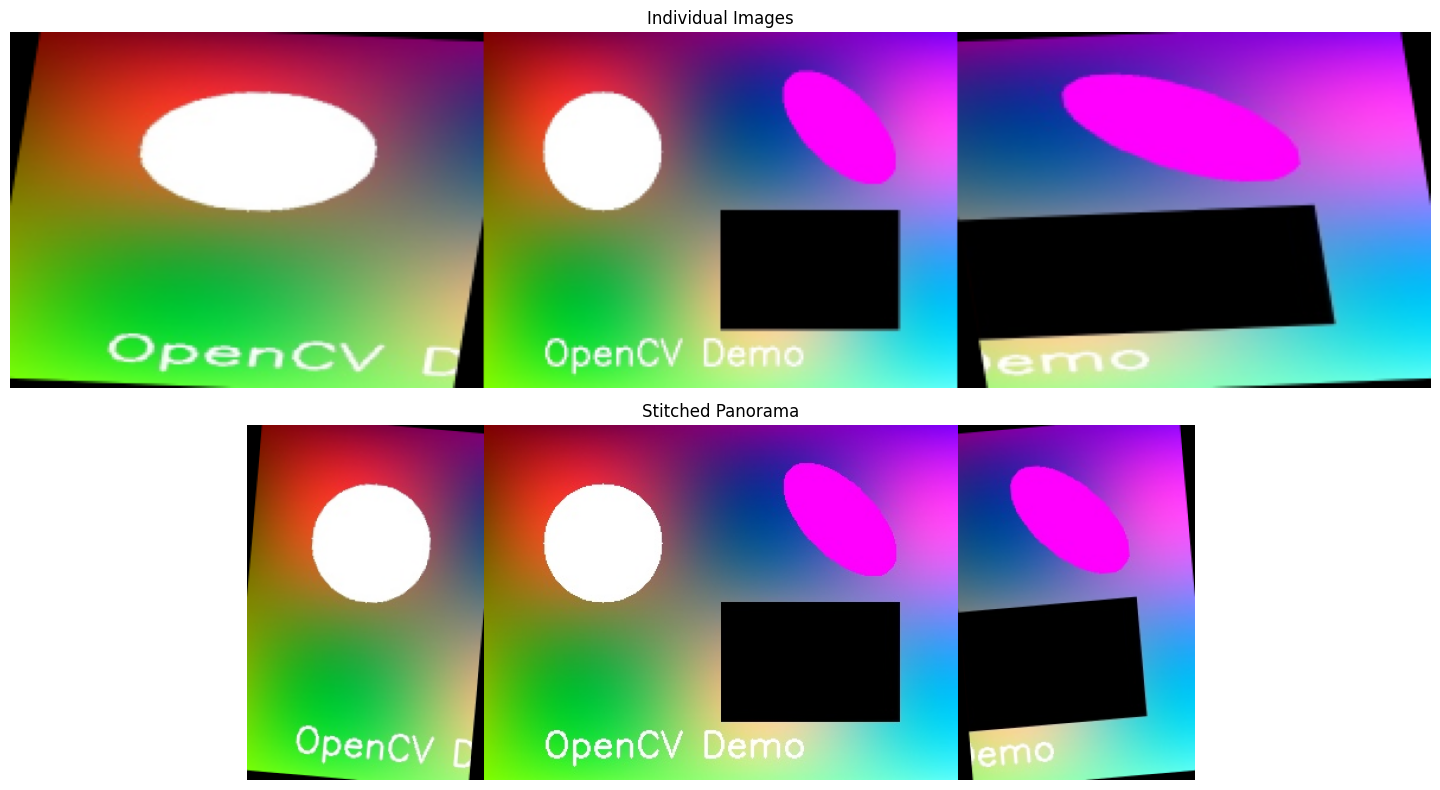

In [46]:
# Create multiple views for panorama simulation
img_left = image[:, :image.shape[1]//2]
img_center = image
img_right = image[:, image.shape[1]//2:]

# Apply slight transformations to simulate different viewpoints
img_left = affine_transforms.rotate(img_left, -5)
img_right = affine_transforms.rotate(img_right, 5)

# Simple panorama creation (horizontal stitching)
def simple_create_panorama(images):
    """Simple panorama creation by horizontal concatenation."""
    # Resize all images to same height
    target_height = min(img.shape[0] for img in images)
    resized_images = []
    
    for img in images:
        if img.shape[0] != target_height:
            aspect_ratio = img.shape[1] / img.shape[0]
            target_width = int(target_height * aspect_ratio)
            resized_img = cv2.resize(img, (target_width, target_height))
        else:
            resized_img = img
        resized_images.append(resized_img)
    
    # Horizontally concatenate images
    return np.hstack(resized_images)

panorama = simple_create_panorama([img_left, img_center, img_right])

# Display results
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Show individual images
combined_view = np.hstack([
    cv2.resize(img_left, (200, 150)),
    cv2.resize(img_center, (200, 150)),
    cv2.resize(img_right, (200, 150))
])
axes[0].imshow(cv2.cvtColor(combined_view, cv2.COLOR_BGR2RGB))
axes[0].set_title('Individual Images')
axes[0].axis('off')

# Show panorama
axes[1].imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
axes[1].set_title('Stitched Panorama')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 6. Exercises {#exercises}

Try these exercises to practice geometric transformations:

### Exercise 1: Create a Photo Booth Effect
Apply multiple transformations to create fun photo effects.

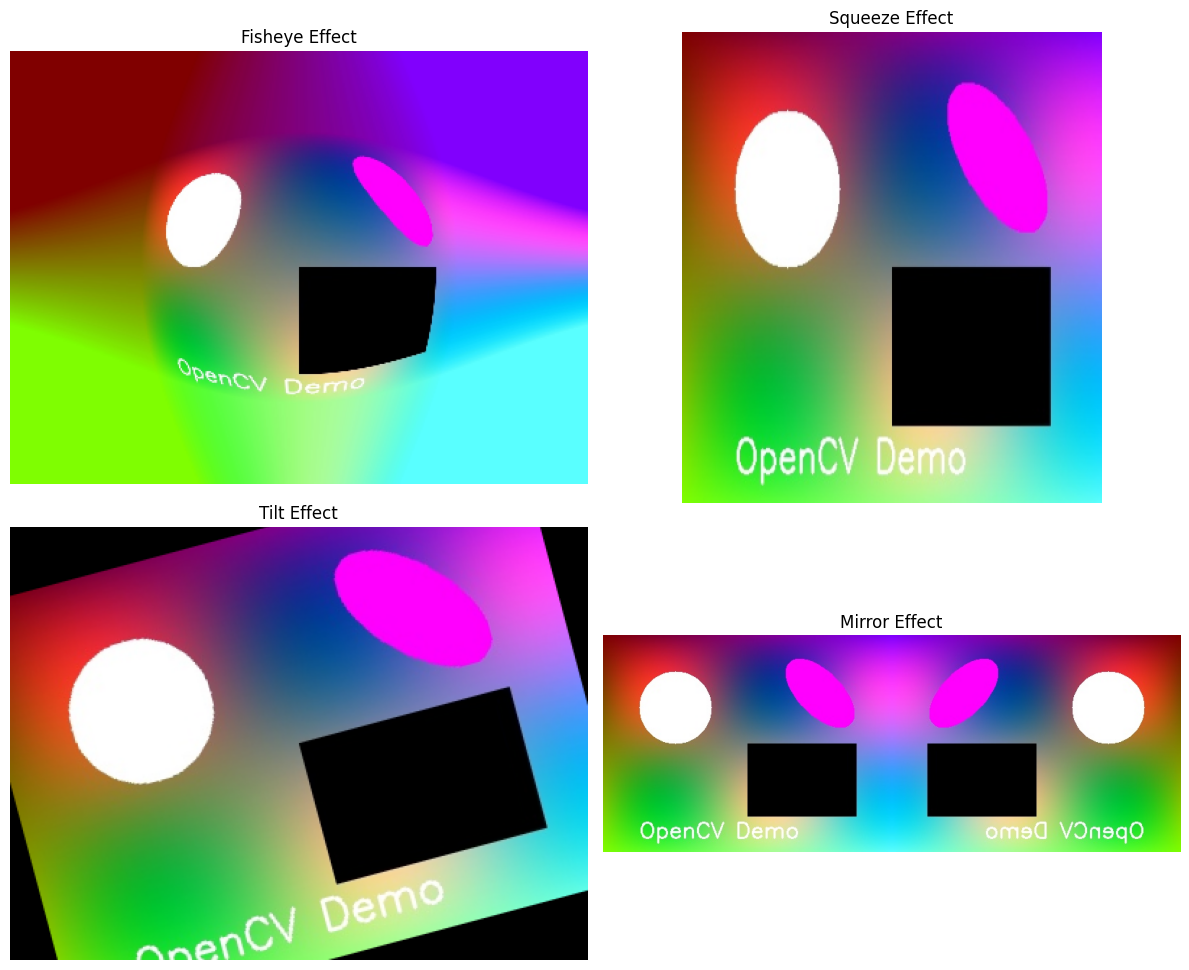

In [47]:
# Exercise 1: Photo booth effects
def create_fisheye_effect(img, strength=1.5):
    """Create a simple fisheye effect."""
    h, w = img.shape[:2]
    center_x, center_y = w // 2, h // 2
    
    # Create coordinate arrays
    x = np.arange(w) - center_x
    y = np.arange(h) - center_y
    x_coords, y_coords = np.meshgrid(x, y)
    
    # Calculate distance from center
    r = np.sqrt(x_coords**2 + y_coords**2)
    max_r = min(w, h) // 2
    
    # Apply fisheye distortion
    r_new = r * (1 + strength * (r / max_r)**2)
    
    # Convert back to cartesian coordinates
    theta = np.arctan2(y_coords, x_coords)
    x_fish = r_new * np.cos(theta) + center_x
    y_fish = r_new * np.sin(theta) + center_y
    
    # Ensure coordinates are within bounds
    x_fish = np.clip(x_fish, 0, w-1)
    y_fish = np.clip(y_fish, 0, h-1)
    
    return cv2.remap(img, x_fish.astype(np.float32), y_fish.astype(np.float32), cv2.INTER_LINEAR)

def create_photo_booth_effect(img, effect_type):
    """Create different photo booth style effects."""
    if effect_type == 'fisheye':
        return create_fisheye_effect(img, strength=1.5)
    elif effect_type == 'squeeze':
        return affine_transforms.scale(img, 0.8, 1.2)
    elif effect_type == 'tilt':
        return affine_transforms.rotate(img, 15)
    elif effect_type == 'mirror':
        return np.hstack([img, cv2.flip(img, 1)])
    else:
        return img

# Apply different effects
effects = ['fisheye', 'squeeze', 'tilt', 'mirror']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, effect in enumerate(effects):
    row, col = i // 2, i % 2
    effect_img = create_photo_booth_effect(image, effect)
    axes[row, col].imshow(cv2.cvtColor(effect_img, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f'{effect.capitalize()} Effect')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Exercise 2: Perspective Keystone Correction
Correct keystone distortion commonly seen in projector displays.

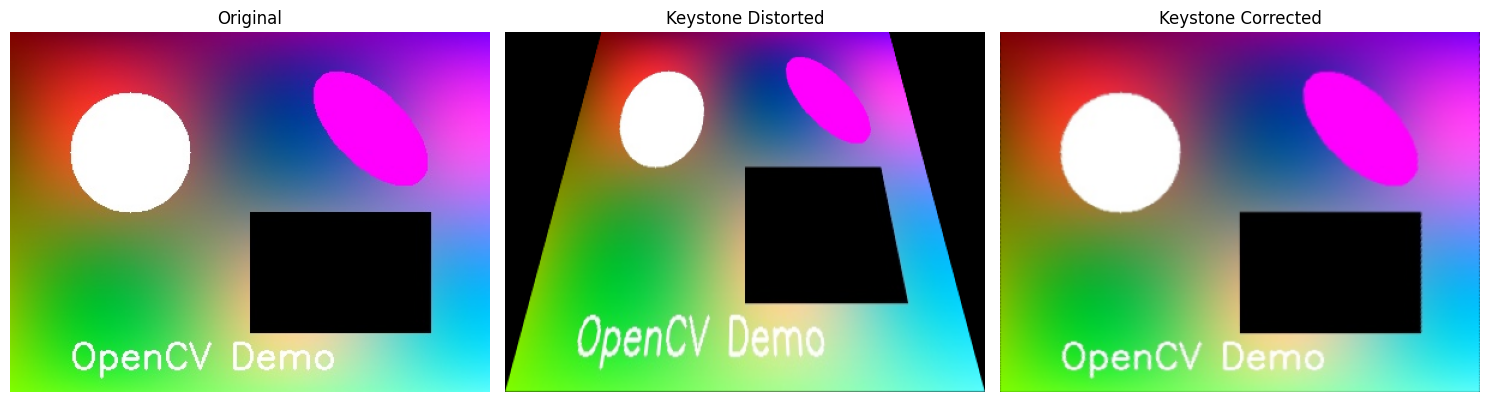

In [48]:
# Exercise 2: Keystone correction
def apply_keystone_distortion(img, top_squeeze=0.8):
    """Apply keystone distortion to simulate projector effect."""
    h, w = img.shape[:2]
    
    # Define keystone distortion points
    src_points = np.float32([[0, 0], [w, 0], [0, h], [w, h]])
    dst_points = np.float32([
        [w*(1-top_squeeze)/2, 0],     # Top-left squeezed
        [w*(1+top_squeeze)/2, 0],     # Top-right squeezed  
        [0, h],                       # Bottom-left normal
        [w, h]                        # Bottom-right normal
    ])
    
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    return cv2.warpPerspective(img, M, (w, h))

def correct_keystone(img, top_squeeze=0.8):
    """Correct keystone distortion."""
    h, w = img.shape[:2]
    
    # Reverse the keystone transformation
    # Source points are now the distorted coordinates
    src_points = np.float32([
        [w*(1-top_squeeze)/2, 0],     # Top-left squeezed
        [w*(1+top_squeeze)/2, 0],     # Top-right squeezed
        [0, h],                       # Bottom-left normal
        [w, h]                        # Bottom-right normal
    ])
    # Destination points are the original rectangle
    dst_points = np.float32([[0, 0], [w, 0], [0, h], [w, h]])
    
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    return cv2.warpPerspective(img, M, (w, h))

# Apply and correct keystone distortion
keystone_distorted = apply_keystone_distortion(image, 0.6)
keystone_corrected = correct_keystone(keystone_distorted, 0.6)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(keystone_distorted, cv2.COLOR_BGR2RGB))
axes[1].set_title('Keystone Distorted')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(keystone_corrected, cv2.COLOR_BGR2RGB))
axes[2].set_title('Keystone Corrected')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Exercise 3: Transformation Pipeline
Create a complete transformation pipeline with multiple steps.

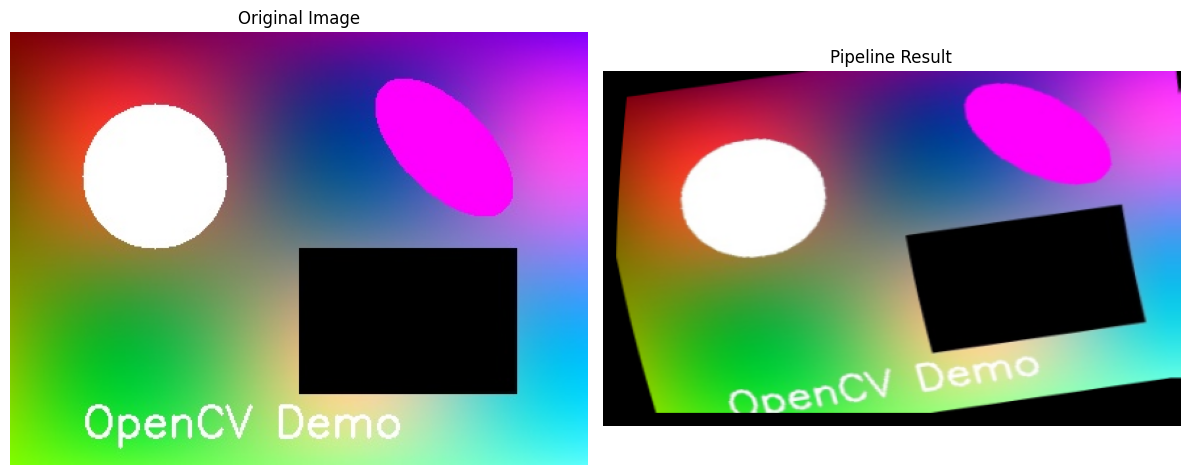

Transformation pipeline applied:
1. rotate: {'type': 'rotate', 'angle': 10}
2. scale: {'type': 'scale', 'sx': 1.1, 'sy': 0.9}
3. translate: {'type': 'translate', 'tx': 20, 'ty': -10}
4. warp: {'type': 'warp', 'warp_type': 'wave', 'amplitude': 10, 'frequency': 0.01}


In [49]:
# Exercise 3: Transformation pipeline
def transformation_pipeline(img, params):
    """Apply a series of transformations based on parameters."""
    result = img.copy()
    
    for transform in params:
        transform_type = transform['type']
        
        if transform_type == 'rotate':
            result = affine_transforms.rotate(result, transform['angle'])
        elif transform_type == 'scale':
            result = affine_transforms.scale(result, transform['sx'], transform['sy'])
        elif transform_type == 'translate':
            result = affine_transforms.translate(result, transform['tx'], transform['ty'])
        elif transform_type == 'perspective':
            result = perspective_transforms.perspective_transform(
                result, transform['src_points'], transform['dst_points']
            )
        elif transform_type == 'warp':
            if transform['warp_type'] == 'wave':
                result = create_wave_distortion(result, transform['amplitude'], transform['frequency'])
    
    return result

# Define transformation pipeline
pipeline_params = [
    {'type': 'rotate', 'angle': 10},
    {'type': 'scale', 'sx': 1.1, 'sy': 0.9},
    {'type': 'translate', 'tx': 20, 'ty': -10},
    {'type': 'warp', 'warp_type': 'wave', 'amplitude': 10, 'frequency': 0.01}
]

# Apply pipeline
pipeline_result = transformation_pipeline(image, pipeline_params)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(pipeline_result, cv2.COLOR_BGR2RGB))
axes[1].set_title('Pipeline Result')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("Transformation pipeline applied:")
for i, transform in enumerate(pipeline_params, 1):
    print(f"{i}. {transform['type']}: {transform}")

## Summary

In this notebook, we explored:

1. **Affine Transformations**: Translation, rotation, scaling, shearing, and combinations
2. **Perspective Transformations**: Four-point transforms, document correction, image registration
3. **Image Warping**: Barrel distortion correction, wave effects, swirl effects
4. **Practical Applications**: Image registration, panorama creation, perspective correction
5. **Advanced Techniques**: Photo booth effects, keystone correction, transformation pipelines

### Key Takeaways:
- Affine transformations preserve parallel lines and ratios of distances
- Perspective transformations can correct camera angles and create 3D effects
- Image warping enables complex distortion corrections and artistic effects
- Transformation matrices can be combined for complex operations
- Real-world applications include document scanning, panorama stitching, and AR/VR

### Next Steps:
- Experiment with different transformation parameters
- Try combining multiple transformations
- Apply these techniques to your own images
- Explore advanced warping techniques for specific use cases